In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [2]:
# load telecom dataset
filename = '/home/fan/Desktop/telecom_users.csv'
df = pd.read_csv(filename)
df = df.drop(['Unnamed: 0', 'customerID', 'TotalCharges'], axis=1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes        Yes      72          Yes   
1  Female              0      No         No      44          Yes   
2  Female              1     Yes         No      38          Yes   
3    Male              0      No         No       4          Yes   
4    Male              0      No         No       2          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes              No  No internet service  No internet service   
1            No     Fiber optic                   No                  Yes   
2           Yes     Fiber optic                   No                   No   
3            No             DSL                   No                   No   
4            No             DSL                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service        Two year               No   
1                   No  Month-to-month              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month              Yes   
4                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges Churn  
0    Credit card (automatic)           24.10    No  
1    Credit card (automatic)           88.15    No  
2  Bank transfer (automatic)           74.95   Yes  
3           Electronic check           55.90    No  
4           Electronic check           53.45    No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [4]:
# encode the categorical attributes
from sklearn.preprocessing import LabelEncoder
df['gender'].replace(to_replace='Male', value=1, inplace=True)
df['gender'].replace(to_replace='Female',  value=0, inplace=True)
df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
df['Dependents'].replace(to_replace='No',  value=0, inplace=True)
df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)
df['PaperlessBilling'].replace(to_replace='No',  value=0, inplace=True)
df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
df['Partner'].replace(to_replace='No',  value=0, inplace=True)
for col in ["Bank transfer (automatic)","Credit card (automatic)","Electronic check","Mailed check"]:
    df['PaymentMethod'] = LabelEncoder().fit_transform(df['PaymentMethod'])
for col in ["No","Fiber optic","DSL"]:
    df['InternetService'] = LabelEncoder().fit_transform(df['InternetService'])
for col in ["No","Yes","No internet service"]:
    df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
for col in ["No","Yes","No internet service"]:
    df['OnlineBackup'] = LabelEncoder().fit_transform(df['OnlineBackup'])
for col in ["No","Yes","No internet service"]:
    df['DeviceProtection'] = LabelEncoder().fit_transform(df['DeviceProtection'])
for col in ["No","Yes","No internet service"]:
    df['TechSupport'] = LabelEncoder().fit_transform(df['TechSupport'])
for col in ["No","Yes","No internet service"]:
    df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
for col in ["Two year","Month-to-month","One year","Two year"]:
    df['Contract'] = LabelEncoder().fit_transform(df['Contract'])
for col in ["Two year","Month-to-month","One year","Two year"]:
    df['Contract'] = LabelEncoder().fit_transform(df['Contract'])
for col in ["Yes","No","No internet service"]:
    df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
for col in ["Yes","No"]:
    df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
for col in ["Yes","No","No internet service"]:
    df['MultipleLines'] = LabelEncoder().fit_transform(df['MultipleLines'])
for col in ["Yes","No"]:
    df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
    
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           1      72             1   
1          0              0        0           0      44             1   
2          0              1        1           0      38             1   
3          1              0        0           0       4             1   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
5981       1              0        1           0       1             1   
5982       0              0        1           1      23             1   
5983       1              0        1           1      12             1   
5984       1              1        0           0      12             1   
5985       1              0        0           0      26             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                2               1             1   
1                 0                1               0             2   
2                 2                1               0             0   
3                 0                0               0             0   
4                 0                0               2             0   
...             ...              ...             ...           ...   
5981              0                1               2             0   
5982              2                0               2             2   
5983              0                2               1             1   
5984              2                1               0             0   
5985              0                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    1            1            1                1         2   
1                    2            0            2                0         0   
2                    0            0            0                0         0   
3                    0            0            0                2         0   
4                    2            0            0                0         0   
...                ...          ...          ...              ...       ...   
5981                 0            0            2                2         0   
5982                 2            2            2                2         2   
5983                 1            1            1                1         0   
5984                 2            0            2                2         0   
5985                 1            1            1                1         1   

      PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
0                    0              1           24.10      0  
1                    1              1           88.15      0  
2                    1              0           74.95      1  
3                    1              2           55.90      0  
4                    0              2           53.45      0  
...                ...            ...             ...    ...  
5981                 1              2           95.00      1  
5982                 1              1           91.10      0  
5983                 1              2           21.15      0  
5984                 1              2           99.45      1  
5985                 0              1           19.80      0  

[5986 rows x 19 columns]

In [5]:
df["tenure"] = df["tenure"].div(10).div(7.2).round(2)
df["MonthlyCharges"] = df["MonthlyCharges"].div(100).div(1.19).round(2)
df["MultipleLines"] = df["MultipleLines"].div(2).round(2)
df["InternetService"] = df["InternetService"].div(2).round(2)
df["OnlineSecurity"] = df["OnlineSecurity"].div(2).round(2)
df["OnlineBackup"] = df["OnlineBackup"].div(2).round(2)
df["DeviceProtection"] = df["DeviceProtection"].div(2).round(2)
df["TechSupport"] = df["TechSupport"].div(2).round(2)
df["StreamingTV"] = df["StreamingTV"].div(2).round(2)
df["StreamingMovies"] = df["StreamingMovies"].div(2).round(2)
df["Contract"] = df["Contract"].div(2).round(2)
df["PaymentMethod"] = df["PaymentMethod"].div(3).round(2)
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  5986.000000    5986.000000  5986.000000  5986.000000  5986.000000   
mean      0.509522       0.161377     0.485132     0.299198     0.450809   
std       0.499951       0.367909     0.499821     0.457945     0.340962   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.120000   
50%       1.000000       0.000000     0.000000     0.000000     0.400000   
75%       1.000000       0.000000     1.000000     1.000000     0.780000   
max       1.000000       1.000000     1.000000     1.000000     1.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   5986.000000    5986.000000      5986.000000     5986.000000   
mean       0.901437       0.474942         0.435099        0.394003   
std        0.298100       0.474098         0.368912        0.429974   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       0.500000         0.500000        0.500000   
75%        1.000000       1.000000         0.500000        1.000000   
max        1.000000       1.000000         1.000000        1.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   5986.000000       5986.000000  5986.000000  5986.000000   
mean       0.456983          0.451136     0.397678     0.493067   
std        0.440754          0.440145     0.430864     0.442795   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        0.500000          0.500000     0.500000     0.500000   
75%        1.000000          1.000000     1.000000     1.000000   
max        1.000000          1.000000     1.000000     1.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      5986.000000  5986.000000       5986.000000    5986.000000   
mean          0.498580     0.347310          0.589375       0.525060   
std           0.442847     0.416442          0.491988       0.356611   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       0.330000   
50%           0.500000     0.000000          1.000000       0.670000   
75%           1.000000     0.500000          1.000000       0.670000   
max           1.000000     1.000000          1.000000       1.000000   

       MonthlyCharges        Churn  
count     5986.000000  5986.000000  
mean         0.544592     0.265119  
std          0.253051     0.441433  
min          0.150000     0.000000  
25%          0.300000     0.000000  
50%          0.590000     0.000000  
75%          0.760000     1.000000  
max          1.000000     1.000000

In [6]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           1    1.00             1   
1          0              0        0           0    0.61             1   
2          0              1        1           0    0.53             1   
3          1              0        0           0    0.06             1   
4          1              0        0           0    0.03             1   
...      ...            ...      ...         ...     ...           ...   
5981       1              0        1           0    0.01             1   
5982       0              0        1           1    0.32             1   
5983       1              0        1           1    0.17             1   
5984       1              1        0           0    0.17             1   
5985       1              0        0           0    0.36             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               1.0              1.0             0.5           0.5   
1               0.0              0.5             0.0           1.0   
2               1.0              0.5             0.0           0.0   
3               0.0              0.0             0.0           0.0   
4               0.0              0.0             1.0           0.0   
...             ...              ...             ...           ...   
5981            0.0              0.5             1.0           0.0   
5982            1.0              0.0             1.0           1.0   
5983            0.0              1.0             0.5           0.5   
5984            1.0              0.5             0.0           0.0   
5985            0.0              1.0             0.5           0.5   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.5          0.5          0.5              0.5       1.0   
1                  1.0          0.0          1.0              0.0       0.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  0.0          0.0          0.0              1.0       0.0   
4                  1.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
5981               0.0          0.0          1.0              1.0       0.0   
5982               1.0          1.0          1.0              1.0       1.0   
5983               0.5          0.5          0.5              0.5       0.0   
5984               1.0          0.0          1.0              1.0       0.0   
5985               0.5          0.5          0.5              0.5       0.5   

      PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
0                    0           0.33            0.20      0  
1                    1           0.33            0.74      0  
2                    1           0.00            0.63      1  
3                    1           0.67            0.47      0  
4                    0           0.67            0.45      0  
...                ...            ...             ...    ...  
5981                 1           0.67            0.80      1  
5982                 1           0.33            0.77      0  
5983                 1           0.67            0.18      0  
5984                 1           0.67            0.84      1  
5985                 0           0.33            0.17      0  

[5986 rows x 19 columns]

In [7]:
# define categorical features
features_cat = ['gender','SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineBackup', 'DeviceProtection','PaperlessBilling',
                'StreamingTV', 'StreamingMovies',
                'PaymentMethod','OnlineSecurity','TechSupport',
                'Contract','tenure','MonthlyCharges', 'Churn']

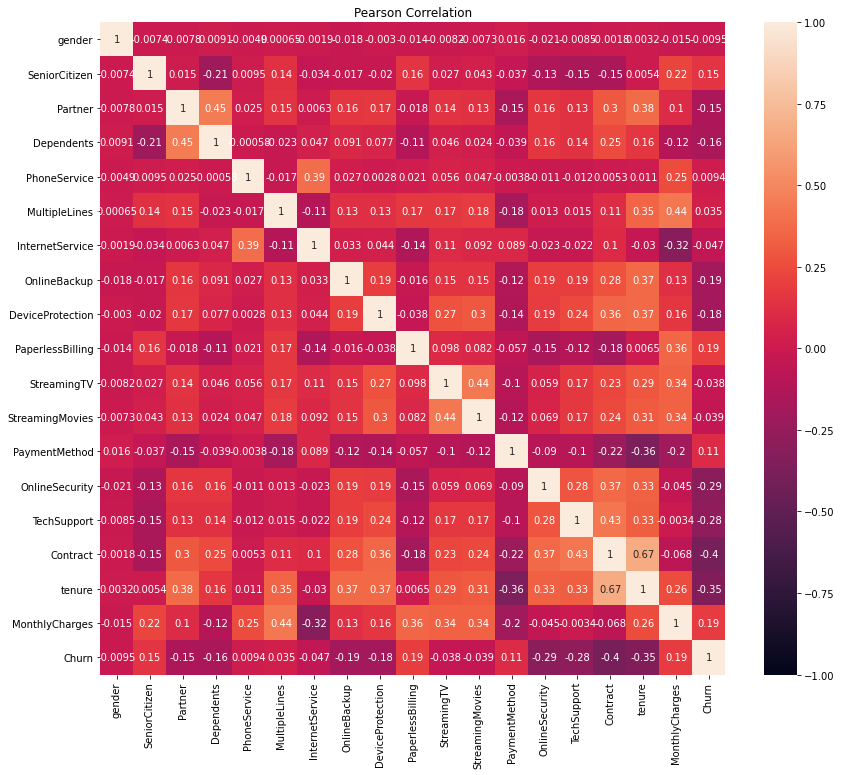

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson (linear) correlation
corr_pearson = df[features_cat].corr(method='pearson')

fig = plt.figure(figsize = (14,12))
sns.heatmap(corr_pearson, annot=True, vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

In [9]:
# standard package
import time

# ML tools
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [10]:
# define categorical features
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling','PaymentMethod']
# define numerical features
num = ['tenure','MonthlyCharges']
# define target
target = 'Churn'

In [11]:
# select predictors
predictors = num + cat
print('Number of predictors: ', len(predictors))
print(predictors)

Number of predictors:  18
['tenure', 'MonthlyCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [12]:
# initialize the h2o module
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/fan/tutorial-env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc8wdgh67
  JVM stdout: /tmp/tmpc8wdgh67/h2o_fan_started_from_python.out
  JVM stderr: /tmp/tmpc8wdgh67/h2o_fan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Europe/Berlin
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.3
H2O_cluster_version_age:    1 month and 10 days
H2O_cluster_name:           H2O_from_python_fan_1gqkoj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.406 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.9 final
--------------------------  ------------------------------------------------------------------

In [13]:
# upload dataframe in h2o environment
df_hex = h2o.H2OFrame(df)

# train and test split into 70:30
train_hex, test_hex = df_hex.split_frame(ratios=[0.7], seed=999)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
# cross validation
n_CV = 5 

In [15]:
# define Random Forest model
fit_2 = H2ORandomForestEstimator(ntrees=50,
                                   max_depth=15,
                                   min_rows=5,
                                   nfolds=n_CV,
                                   model_id='DRF_1',
                                   seed=999)

In [16]:
# train model
t1 = time.time()
fit_2.train(x=predictors,
            y=target,
            training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

drf Model Build progress: |███████████████████████████████████████████████| 100%
Elapsed time [s]:  12.81


In [17]:
# display cross validation metrics
fit_2.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


mean            sd  cv_1_valid  cv_2_valid  \
0                     mae  0.26373607  0.0070433994   0.2650084   0.2657669   
1  mean_residual_deviance  0.13398458  0.0038040315   0.1353785  0.13495396   
2                     mse  0.13398458  0.0038040315   0.1353785  0.13495396   
3                      r2  0.30936256   0.020045755  0.31183964   0.2909151   
4       residual_deviance  0.13398458  0.0038040315   0.1353785  0.13495396   
5                    rmse  0.36600956   0.005192889   0.3679382   0.3673608   
6                   rmsle  0.25726786   0.004573844   0.2566092  0.25891232   

   cv_3_valid  cv_4_valid  cv_5_valid  
0  0.25285688  0.26274708   0.2723011  
1  0.12962377  0.13086095  0.13910572  
2  0.12962377  0.13086095  0.13910572  
3  0.32246998  0.33408546  0.28750262  
4  0.12962377  0.13086095  0.13910572  
5    0.360033   0.3617471   0.3729688  
6  0.25239164  0.25425336  0.26417273

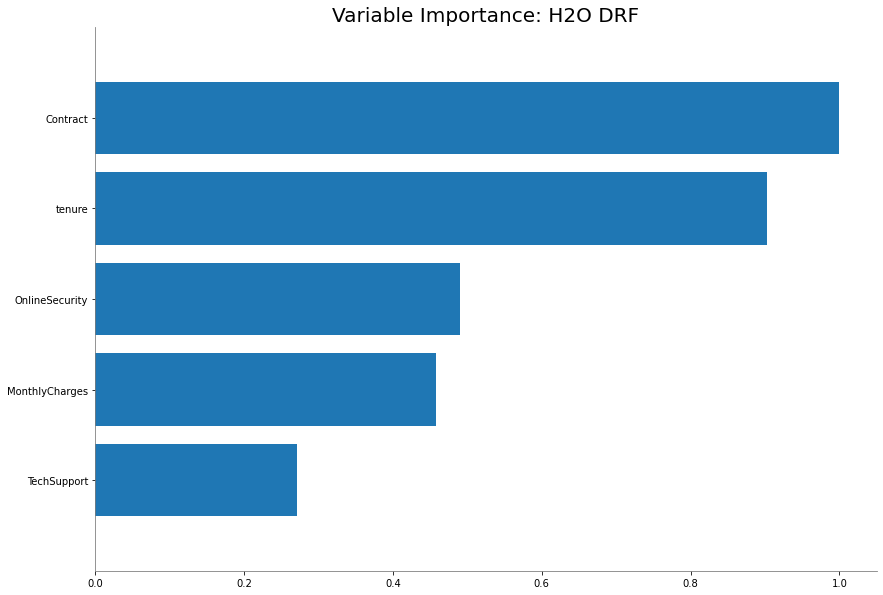

In [18]:
# show variable importance
fit_2.varimp_plot(5)

In [20]:
from sklearn.model_selection import train_test_split, cross_validate

# split the dataset into test data and train data
df_train, df_test = train_test_split(df)

In [21]:
df_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3152       0              0        0           0    0.69             1   
3587       0              0        1           0    1.00             1   
955        1              0        0           1    0.10             1   
1720       0              0        1           0    0.14             1   
5463       0              0        0           0    0.64             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3152            0.0              0.5             0.0           1.0   
3587            1.0              1.0             0.5           0.5   
955             0.0              1.0             0.5           0.5   
1720            0.0              1.0             0.5           0.5   
5463            1.0              0.5             0.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
3152               0.0          1.0          1.0              1.0       1.0   
3587               0.5          0.5          0.5              0.5       1.0   
955                0.5          0.5          0.5              0.5       0.5   
1720               0.5          0.5          0.5              0.5       0.0   
5463               0.0          0.0          1.0              1.0       0.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
3152                 1           1.00            0.84      0  
3587                 0           0.33            0.22      0  
955                  0           1.00            0.16      0  
1720                 1           1.00            0.17      0  
5463                 0           0.00            0.81      1

In [25]:
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report

In [26]:
# create a decision tree classifier object
tree1 = DecisionTreeClassifier()
# fit the train dataset in the classifier
tree1 = tree1.fit(X=df_train.drop(["Churn"], axis=1),
                  y=df_train.Churn)

In [27]:
# examine the accuracy of tree1 on the training set in terms of performance metrics using classification report
# precision shows how 'correct' the prediction is (true positives/all positivespredicted by the model)
# recall shows how 'often' tree1 predicts correctly (true positives/true positives + false negatives)
# f1-score takes precision and recall into account and shows the ultimate accuracy of the model, used for comparing different algorithms
# macro avg is the mean of No and Yes classes of precision/recall/f1-score
# macro avg treats all classes equally
# weighted average = total True Positive of No and Yes classes/total number of objects of No and Yes classes 
# weighted average aggregate contributions of all classes
# https://medium.com/analytics-vidhya/understanding-the-concept-of-error-analysis-7e8ec3fee398
# https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

pred1 = tree1.predict(df_train.drop(["Churn"], axis=1)) 
print(classification_report(df_train.Churn, pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3321
           1       0.99      0.96      0.98      1168

    accuracy                           0.99      4489
   macro avg       0.99      0.98      0.98      4489
weighted avg       0.99      0.99      0.99      4489



In [28]:
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()

#export a visualization of the tree

export_graphviz(tree1, out_file=dot_data, 
                # parameters for the display of graph
                filled=True, rounded=True, special_characters=True, 
                # use feature names
                feature_names=["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges"],
                # show proportions for labels
                proportion=True)

In [29]:
# display graph
# displayed tree shows extremely complicated rule for predicting if a customer churn or not
# the ID3 algorithm is overfitting
graph1=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.492004 to fit



In [31]:
# get the tree depth
print(tree1.tree_.max_depth)

22


In [32]:
# examine the accuracy of ID3 algorithm on the testing set
pred2 = tree1.predict(df_test.drop(["Churn"], axis=1))           
# the ID3 algorithm is not as accurate as it was on the training set
# the ID3 algorithm is overfitting
print(classification_report(df_test.Churn, pred2))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1078
           1       0.49      0.47      0.48       419

    accuracy                           0.72      1497
   macro avg       0.64      0.64      0.64      1497
weighted avg       0.71      0.72      0.71      1497



In [33]:
# by default, the tree will be as deep as possible if no restriction on tree depth
# means ID3 tend to overfit
# restricing tree depth is needed to overcome overfitting as simpler trees overfit less than deep trees
# use cross-validation to find the optimal tree depth

# get the accuracies of different candidate depths from 2 to 20 
m_candidate = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
res = dict()

for m in m_candidate:
    pred3 = DecisionTreeClassifier(max_depth=m)
    res[m] = cross_validate(pred3, 
                            X=df_train.drop(["Churn"], axis=1),
                            y=df_train.Churn,
                            cv=10,
                            return_train_score=False,
                            scoring='accuracy')
    
resdf = DataFrame({(i, j): res[i][j]
                            for i in res.keys()
                            for j in res[i].keys()}).T

resdf.loc[(slice(None), 'test_score'), :]

0         1         2         3         4         5  \
2  test_score  0.741648  0.728285  0.717149  0.759465  0.708241  0.743875   
3  test_score  0.792873  0.790646  0.783964  0.781737  0.772829  0.770601   
4  test_score  0.792873  0.790646  0.783964  0.772829  0.772829  0.770601   
5  test_score  0.808463  0.783964  0.797327  0.797327  0.755011  0.775056   
6  test_score  0.797327  0.792873  0.801782  0.801782  0.757238  0.779510   
7  test_score  0.775056  0.770601  0.786192  0.781737  0.786192  0.770601   
8  test_score  0.761693  0.761693  0.775056  0.801782  0.761693  0.777283   
9  test_score  0.748330  0.757238  0.759465  0.766147  0.766147  0.768374   
10 test_score  0.719376  0.737194  0.741648  0.775056  0.755011  0.763920   
11 test_score  0.730512  0.726058  0.741648  0.766147  0.739421  0.750557   
12 test_score  0.717149  0.723831  0.723831  0.779510  0.726058  0.739421   
13 test_score  0.706013  0.699332  0.746102  0.770601  0.746102  0.732739   
14 test_score  0.685969  0.712695  0.732739  0.752784  0.732739  0.737194   
15 test_score  0.688196  0.714922  0.730512  0.752784  0.721604  0.732739   
16 test_score  0.692650  0.726058  0.717149  0.766147  0.739421  0.746102   
17 test_score  0.685969  0.708241  0.732739  0.759465  0.741648  0.746102   
18 test_score  0.697105  0.710468  0.728285  0.772829  0.755011  0.734967   
19 test_score  0.681514  0.712695  0.732739  0.761693  0.739421  0.734967   
20 test_score  0.694878  0.701559  0.726058  0.772829  0.741648  0.741648   

                      6         7         8         9  
2  test_score  0.772829  0.723831  0.739421  0.734375  
3  test_score  0.792873  0.770601  0.777283  0.767857  
4  test_score  0.806236  0.770601  0.777283  0.765625  
5  test_score  0.788419  0.781737  0.783964  0.772321  
6  test_score  0.792873  0.775056  0.759465  0.772321  
7  test_score  0.797327  0.804009  0.759465  0.750000  
8  test_score  0.770601  0.792873  0.766147  0.763393  
9  test_score  0.759465  0.783964  0.757238  0.734375  
10 test_score  0.757238  0.766147  0.752784  0.738839  
11 test_score  0.734967  0.746102  0.752784  0.752232  
12 test_score  0.741648  0.726058  0.748330  0.734375  
13 test_score  0.717149  0.714922  0.750557  0.683036  
14 test_score  0.730512  0.723831  0.732739  0.707589  
15 test_score  0.730512  0.721604  0.723831  0.691964  
16 test_score  0.719376  0.726058  0.726058  0.689732  
17 test_score  0.719376  0.708241  0.741648  0.687500  
18 test_score  0.721604  0.714922  0.719376  0.687500  
19 test_score  0.710468  0.699332  0.723831  0.689732  
20 test_score  0.714922  0.717149  0.737194  0.678571

In [34]:
# get the mean accuracy of candidate depths from 2 to 20
# depth = 5 yields the highest accuracy => maximum depth 
resdf.loc[(slice(None), 'test_score'), :].mean(axis=1)

2   test_score    0.736912
3   test_score    0.780126
4   test_score    0.780349
5   test_score    0.784359
6   test_score    0.783023
7   test_score    0.778118
8   test_score    0.773221
9   test_score    0.760074
10  test_score    0.750721
11  test_score    0.744043
12  test_score    0.736021
13  test_score    0.726655
14  test_score    0.724879
15  test_score    0.720867
16  test_score    0.724875
17  test_score    0.723093
18  test_score    0.724207
19  test_score    0.718639
20  test_score    0.722646
dtype: float64

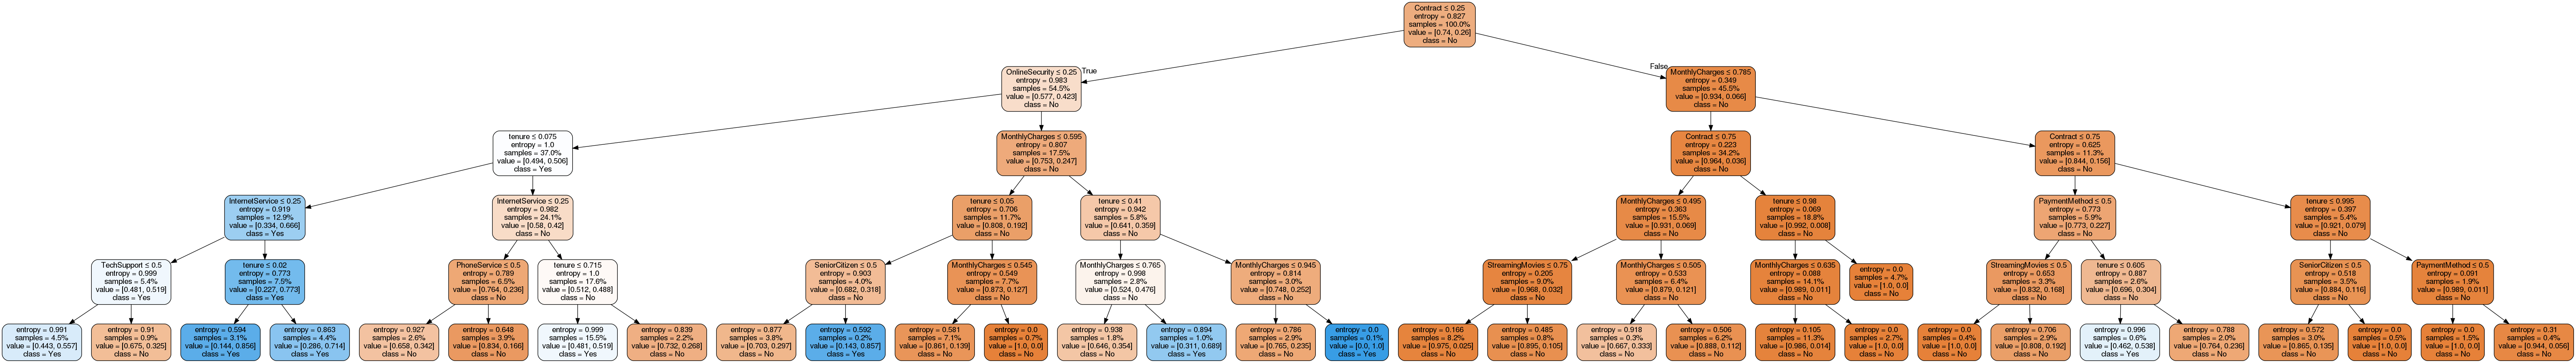

In [35]:
# use ID3 to generate a tree again by limiting maximum tree depth to be 5
tree4 = DecisionTreeClassifier(criterion = "entropy",max_depth=5)
tree4 = tree4.fit(X=df_train.drop(["Churn"], axis=1),
                  y=df_train.Churn)

dot_data = StringIO()

export_graphviz(tree4, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names=["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", 
                               "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                               "PaperlessBilling", "PaymentMethod", "MonthlyCharges"],
                class_names=["No","Yes"],
                proportion=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph2.create_png())

In [36]:
# write the tree as png format
graph2.write_png("telecom14.png")

True

In [37]:
# examine the accuracy of tree1 on the training set in terms of performance metrics using classification report
# precision shows how 'correct' the prediction is (true positives/all positivespredicted by the model)
# recall shows how 'often' tree1 predicts correctly (true positives/true positives + false negatives)
# f1-score takes precision and recall into account and shows the ultimate accuracy of the model, used for comparing different algorithms
# macro avg is the mean of No and Yes classes of precision/recall/f1-score
# macro avg treats all classes equally
# weighted average = total True Positive of No and Yes classes/total number of objects of No and Yes classes 
# weighted average aggregate contributions of all classes
# https://medium.com/analytics-vidhya/understanding-the-concept-of-error-analysis-7e8ec3fee398
# https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

pred1 = tree1.predict(df_train.drop(["Churn"], axis=1)) 
print(classification_report(df_train.Churn, pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3321
           1       0.99      0.96      0.98      1168

    accuracy                           0.99      4489
   macro avg       0.99      0.98      0.98      4489
weighted avg       0.99      0.99      0.99      4489



In [38]:
# examine accuracy of ID3 algorithm on testing set
churn_test_predict = tree4.predict(X=df_test.drop(["Churn"], axis=1))

# get classification report for testing set
# prediction rate is around 77.5%
print(classification_report(df_test.Churn, churn_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1078
           1       0.60      0.64      0.62       419

    accuracy                           0.78      1497
   macro avg       0.73      0.74      0.73      1497
weighted avg       0.78      0.78      0.78      1497



In [39]:
# contract: 2 = 2-year, 1 = 1-year, 0 = month-to-month
# InternetService: 2 = No, 1 = Fiber optic, 0 = DSL
# online security: 2 = Yes, 1 = No internet service, 0 = No
df2=df[["Contract","OnlineSecurity","tenure","MonthlyCharges"]]
df2

Contract  OnlineSecurity  tenure  MonthlyCharges
0          1.0             0.5    1.00            0.20
1          0.0             0.0    0.61            0.74
2          0.0             0.0    0.53            0.63
3          0.0             0.0    0.06            0.47
4          0.0             1.0    0.03            0.45
...        ...             ...     ...             ...
5981       0.0             1.0    0.01            0.80
5982       1.0             1.0    0.32            0.77
5983       0.0             0.5    0.17            0.18
5984       0.0             0.0    0.17            0.84
5985       0.5             0.5    0.36            0.17

[5986 rows x 4 columns]

In [40]:
df2.describe()

Contract  OnlineSecurity       tenure  MonthlyCharges
count  5986.000000     5986.000000  5986.000000     5986.000000
mean      0.347310        0.394003     0.450809        0.544592
std       0.416442        0.429974     0.340962        0.253051
min       0.000000        0.000000     0.000000        0.150000
25%       0.000000        0.000000     0.120000        0.300000
50%       0.000000        0.500000     0.400000        0.590000
75%       0.500000        1.000000     0.780000        0.760000
max       1.000000        1.000000     1.000000        1.000000

In [46]:
df3=df2[["MonthlyCharges"]] 
df3

MonthlyCharges
0               0.20
1               0.74
2               0.63
3               0.47
4               0.45
...              ...
5981            0.80
5982            0.77
5983            0.18
5984            0.84
5985            0.17

[5986 rows x 1 columns]

In [47]:
X3 = df3.values
X3

array([[0.2 ],
       [0.74],
       [0.63],
       ...,
       [0.18],
       [0.84],
       [0.17]])

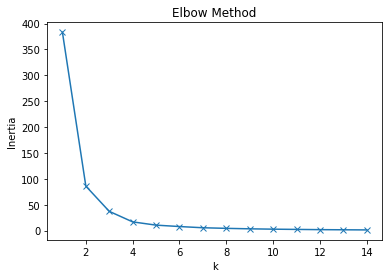

In [48]:
#MonthlyCharges
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init ='k-means++')
    km = km.fit(X3)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel('k')
#plt.xticks(np.arange(15))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [49]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X3)

In [50]:
y_pred

array([1, 0, 2, ..., 1, 0, 1], dtype=int32)

In [51]:
y_pred is kmeans.labels_

True

In [52]:
kmeans.cluster_centers_

array([[0.79094873],
       [0.19679328],
       [0.51744614]])

In [53]:
df_monthlyCharges_clusters = df3.assign(cluster = lambda x: y_pred)
df_monthlyCharges_clusters

MonthlyCharges  cluster
0               0.20        1
1               0.74        0
2               0.63        2
3               0.47        2
4               0.45        2
...              ...      ...
5981            0.80        0
5982            0.77        0
5983            0.18        1
5984            0.84        0
5985            0.17        1

[5986 rows x 2 columns]

In [54]:
df_monthlyCharges_cluster0 = df_monthlyCharges_clusters[(df_monthlyCharges_clusters["cluster"] == 0)]
df_monthlyCharges_cluster0

MonthlyCharges  cluster
1               0.74        0
6               0.76        0
9               0.98        0
12              0.83        0
14              0.92        0
...              ...      ...
5977            0.86        0
5979            0.75        0
5981            0.80        0
5982            0.77        0
5984            0.84        0

[2477 rows x 2 columns]

In [55]:
df_monthlyCharges_cluster0.describe()

MonthlyCharges  cluster
count     2477.000000   2477.0
mean         0.790949      0.0
std          0.086992      0.0
min          0.660000      0.0
25%          0.720000      0.0
50%          0.790000      0.0
75%          0.860000      0.0
max          1.000000      0.0

In [56]:
df_monthlyCharges_cluster1 = df_monthlyCharges_clusters[(df_monthlyCharges_clusters["cluster"] == 1)]
df_monthlyCharges_cluster1

MonthlyCharges  cluster
0               0.20        1
7               0.21        1
8               0.30        1
17              0.22        1
20              0.22        1
...              ...      ...
5972            0.30        1
5974            0.17        1
5980            0.21        1
5983            0.18        1
5985            0.17        1

[1606 rows x 2 columns]

In [57]:
df_monthlyCharges_cluster1.describe()

MonthlyCharges  cluster
count     1606.000000   1606.0
mean         0.196793      1.0
std          0.047634      0.0
min          0.150000      1.0
25%          0.170000      1.0
50%          0.170000      1.0
75%          0.210000      1.0
max          0.350000      1.0

In [58]:
df_monthlyCharges_cluster2 = df_monthlyCharges_clusters[(df_monthlyCharges_clusters["cluster"] == 2)]
df_monthlyCharges_cluster2

MonthlyCharges  cluster
2               0.63        2
3               0.47        2
4               0.45        2
5               0.42        2
10              0.58        2
...              ...      ...
5967            0.54        2
5968            0.59        2
5970            0.42        2
5973            0.64        2
5978            0.38        2

[1903 rows x 2 columns]

In [59]:
df_monthlyCharges_cluster2.describe()

MonthlyCharges  cluster
count     1903.000000   1903.0
mean         0.517446      2.0
std          0.088403      0.0
min          0.360000      2.0
25%          0.430000      2.0
50%          0.520000      2.0
75%          0.590000      2.0
max          0.650000      2.0

In [73]:
df_monthlyCharges_clusters = df_monthlyCharges_clusters.replace({'cluster': {0: 'high_charges'}})
df_monthlyCharges_clusters = df_monthlyCharges_clusters.replace({'cluster': {1: 'low_charges'}})
df_monthlyCharges_clusters = df_monthlyCharges_clusters.replace({'cluster': {2: 'mid_charges'}})
df_monthlyCharges_clusters

MonthlyCharges       cluster
0               0.20   low_charges
1               0.74  high_charges
2               0.63   mid_charges
3               0.47   mid_charges
4               0.45   mid_charges
...              ...           ...
5981            0.80  high_charges
5982            0.77  high_charges
5983            0.18   low_charges
5984            0.84  high_charges
5985            0.17   low_charges

[5986 rows x 2 columns]

In [77]:
df4 = pd.read_csv(filename)
df5 = pd.concat([df4[['Churn','MonthlyCharges']], df_monthlyCharges_clusters['cluster']], axis=1)
df5

Churn  MonthlyCharges       cluster
0       No           24.10   low_charges
1       No           88.15  high_charges
2      Yes           74.95   mid_charges
3       No           55.90   mid_charges
4       No           53.45   mid_charges
...    ...             ...           ...
5981   Yes           95.00  high_charges
5982    No           91.10  high_charges
5983    No           21.15   low_charges
5984   Yes           99.45  high_charges
5985    No           19.80   low_charges

[5986 rows x 3 columns]

<AxesSubplot:xlabel='MonthlyCharges', ylabel='cluster'>

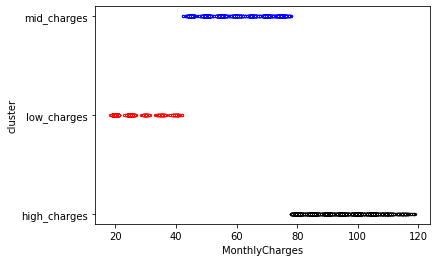

In [79]:
ax = df5[df5['cluster']=='high_charges'].plot.scatter(x='MonthlyCharges', y='cluster', s=5, color='white', edgecolor='black')
df5[df5['cluster']=='low_charges'].plot.scatter(x='MonthlyCharges', y='cluster', s=5, color='white', ax=ax, edgecolor='red')
df5[df5['cluster']=='mid_charges'].plot.scatter(x='MonthlyCharges', y='cluster', s=5, color='white', ax=ax, edgecolor='blue')

In [82]:
df_bayes = df5.copy()
df_bayes

Churn  MonthlyCharges       cluster
0       No           24.10   low_charges
1       No           88.15  high_charges
2      Yes           74.95   mid_charges
3       No           55.90   mid_charges
4       No           53.45   mid_charges
...    ...             ...           ...
5981   Yes           95.00  high_charges
5982    No           91.10  high_charges
5983    No           21.15   low_charges
5984   Yes           99.45  high_charges
5985    No           19.80   low_charges

[5986 rows x 3 columns]

In [83]:
df_bayes.describe()

MonthlyCharges
count     5986.000000
mean        64.802213
std         30.114702
min         18.250000
25%         35.650000
50%         70.400000
75%         89.900000
max        118.750000

In [93]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
groups = df_bayes.groupby(['Churn', pd.cut(df_bayes.MonthlyCharges, bins)])
groups2 = groups.size().unstack()
groups2

MonthlyCharges  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
Churn                                                                        
No                   507       752       115       268       418       349   
Yes                   50        93        46       128       108        97   

MonthlyCharges  (70, 80]  (80, 90]  (90, 100]  (100, 110]  (110, 120]  
Churn                                                                  
No                   475       515        452         391         157  
Yes                  302       280        260         196          27

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983     No
5984    Yes
5985     No
Name: Churn, Length: 5986, dtype: object

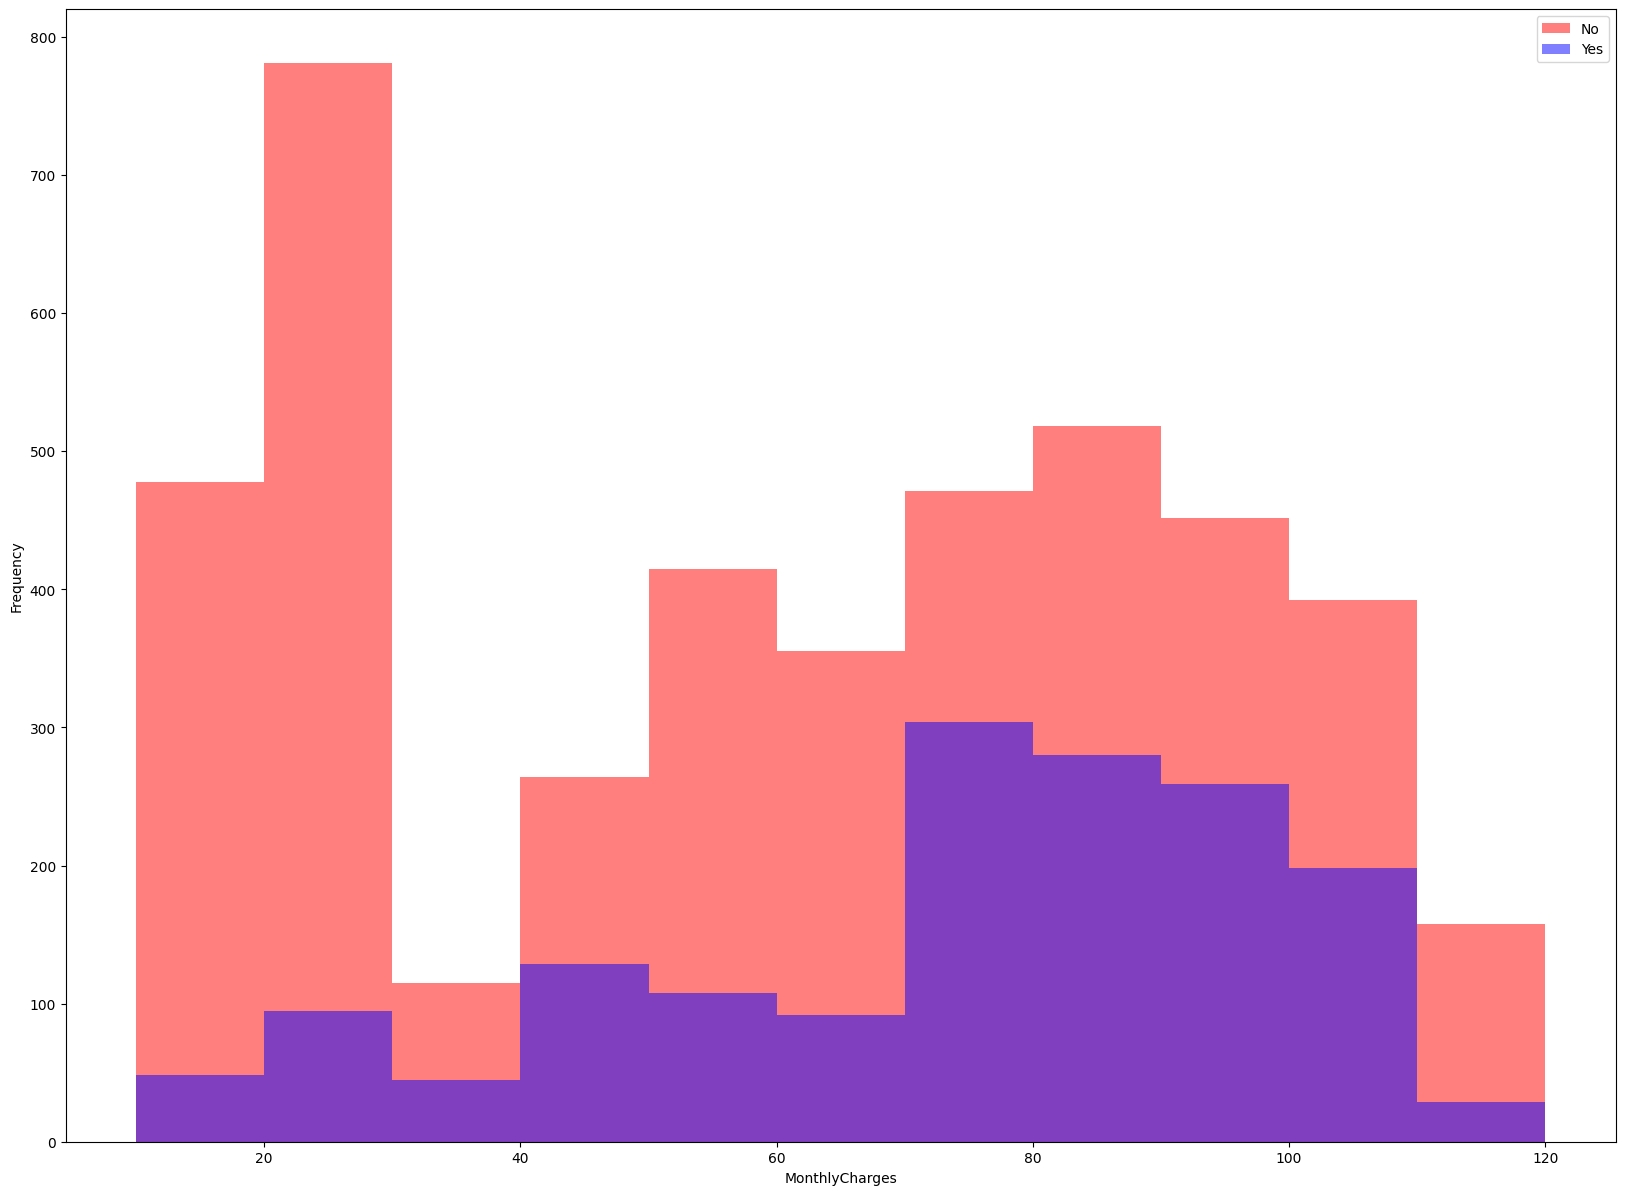

In [96]:
x1=df_bayes.loc[df_bayes.Churn=="No", "MonthlyCharges"]
x2=df_bayes.loc[df_bayes.Churn=="Yes", "MonthlyCharges"]

kwargs = dict(alpha=0.5, bins=bins)

plt.rcParams.update({'figure.figsize' : (20,15), 'figure.dpi': 100})
plt.hist(x1, **kwargs, color='r', label = "No" )
plt.hist(x2, **kwargs, color='b', label = "Yes")
plt.xlabel("MonthlyCharges")
plt.ylabel("Frequency")
plt.legend()
df_bayes["Churn"]

In [99]:
total = groups2.sum()
total.name = 'Total'
groups2 = groups2.append(total.transpose())
groups2

MonthlyCharges  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
Churn                                                                        
No                   507       752       115       268       418       349   
Yes                   50        93        46       128       108        97   
Total                557       845       161       396       526       446   

MonthlyCharges  (70, 80]  (80, 90]  (90, 100]  (100, 110]  (110, 120]  
Churn                                                                  
No                   475       515        452         391         157  
Yes                  302       280        260         196          27  
Total                777       795        712         587         184

In [100]:
df_apriori = groups2.sum(axis=1)
df_apriori

Churn
No       4399
Yes      1587
Total    5986
dtype: int64

In [101]:
df_apriori_procent_no = df_apriori.No/df_apriori.Total
df_apriori_procent_no

0.7348813899097895

In [102]:
df_apriori_procent_yes = df_apriori.Yes/df_apriori.Total
df_apriori_procent_yes

0.2651186100902105

In [112]:
no_likelihood = df.values[0]
no_likelihood

array([507, 752, 115, 268, 418, 349, 475, 515, 452, 391, 157])

In [119]:
yes_likelihood = df.values[1]
yes_likelihood

array([ 50,  93,  46, 128, 108,  97, 302, 280, 260, 196,  27])

In [120]:
no_likelihood_mal_priori = []

In [121]:
for i in no_likelihood:
    p = i * df_apriori_procent_no
    no_likelihood_mal_priori.append(p)
    
no_likelihood_mal_priori

[372.58486468426327,
 552.6308052121617,
 84.51135983962578,
 196.94821249582358,
 307.180420982292,
 256.4736050785165,
 349.06866020715,
 378.46391580354157,
 332.16638823922483,
 287.33862345472767,
 115.37637821583695]

In [122]:
yes_likelihood_mal_priori = []
for i in yes_likelihood:
    p = i * df_apriori_procent_yes
    yes_likelihood_mal_priori.append(p)
    
yes_likelihood_mal_priori

[13.255930504510523,
 24.656030738389575,
 12.195456064149683,
 33.93518209154694,
 28.63280988974273,
 25.716505178750417,
 80.06582024724356,
 74.23321082525894,
 68.93083862345472,
 51.96324757768125,
 7.158202472435683]

In [125]:
total = []
for i in range(0,11):
    t = yes_likelihood_mal_priori[i] + no_likelihood_mal_priori[i]
    total.append(t)
total

[385.84079518877377,
 577.2868359505512,
 96.70681590377546,
 230.88339458737053,
 335.81323087203475,
 282.19011025726695,
 429.13448045439355,
 452.6971266288005,
 401.0972268626796,
 339.30187103240894,
 122.53458068827263]

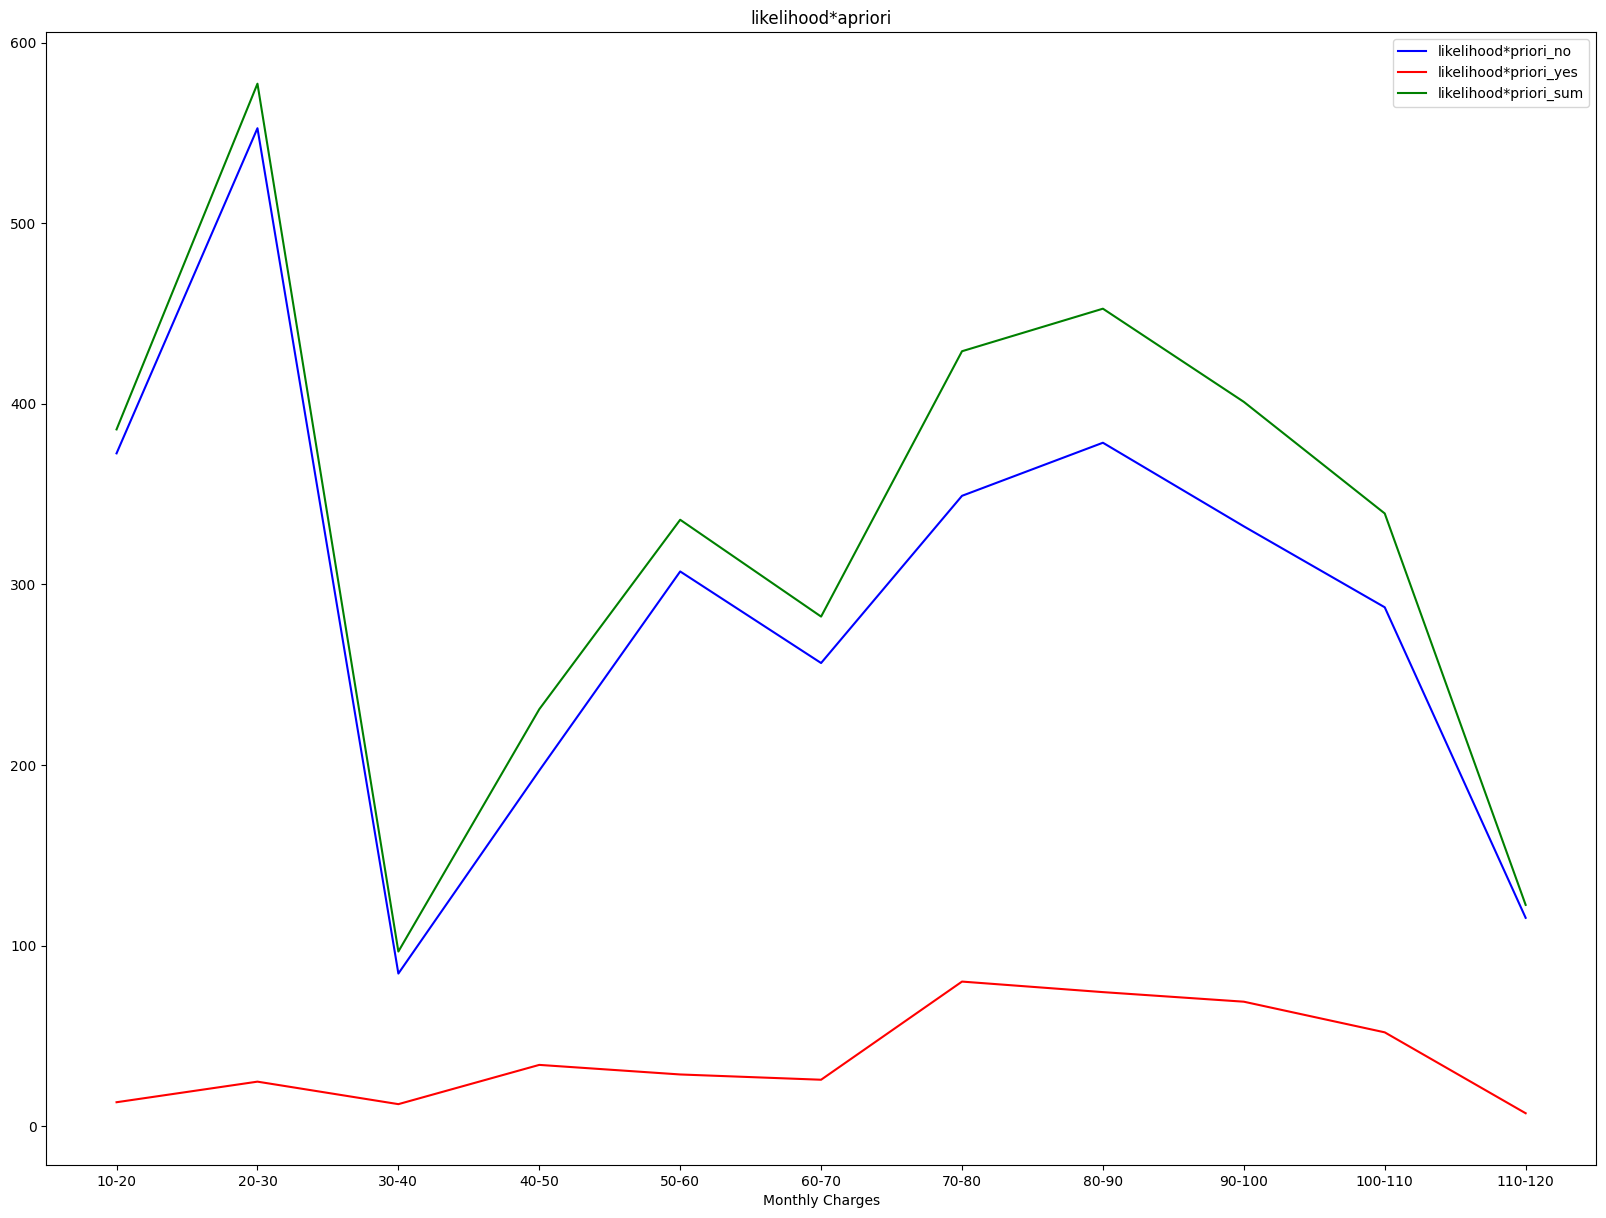

In [129]:
x = (["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100-110", "110-120"])
plt.title("likelihood*apriori")
plt.xlabel("Monthly Charges")
plt.plot(x, no_likelihood_mal_priori, color ="blue", label = "likelihood*priori_no")
plt.plot(x, yes_likelihood_mal_priori, color ="red", label = "likelihood*priori_yes")
plt.plot(x, total, color ="green" , label = "likelihood*priori_sum")
plt.legend()
plt.show()

In [133]:
aposteriori_no = []
for i in range(0,11):
    a = no_likelihood_mal_priori[i] / total[i]
    aposteriori_no.append(a)
    
aposteriori_no

[0.9656440410920649,
 0.9572898094968834,
 0.8738924867893043,
 0.8530202566009777,
 0.914735908959306,
 0.9088681557432852,
 0.8134248728686052,
 0.8360201413733995,
 0.8281443151262323,
 0.8468524579025445,
 0.9415821849454391]

In [132]:
aposteriori_yes = []
for i in range(0,11):
    a = yes_likelihood_mal_priori[i] / total[i]
    aposteriori_yes.append(a)
    
aposteriori_yes

[0.03435595890793512,
 0.04271019050311679,
 0.12610751321069572,
 0.14697974339902234,
 0.0852640910406939,
 0.09113184425671475,
 0.18657512713139487,
 0.16397985862660042,
 0.17185568487376757,
 0.15314754209745546,
 0.05841781505456092]

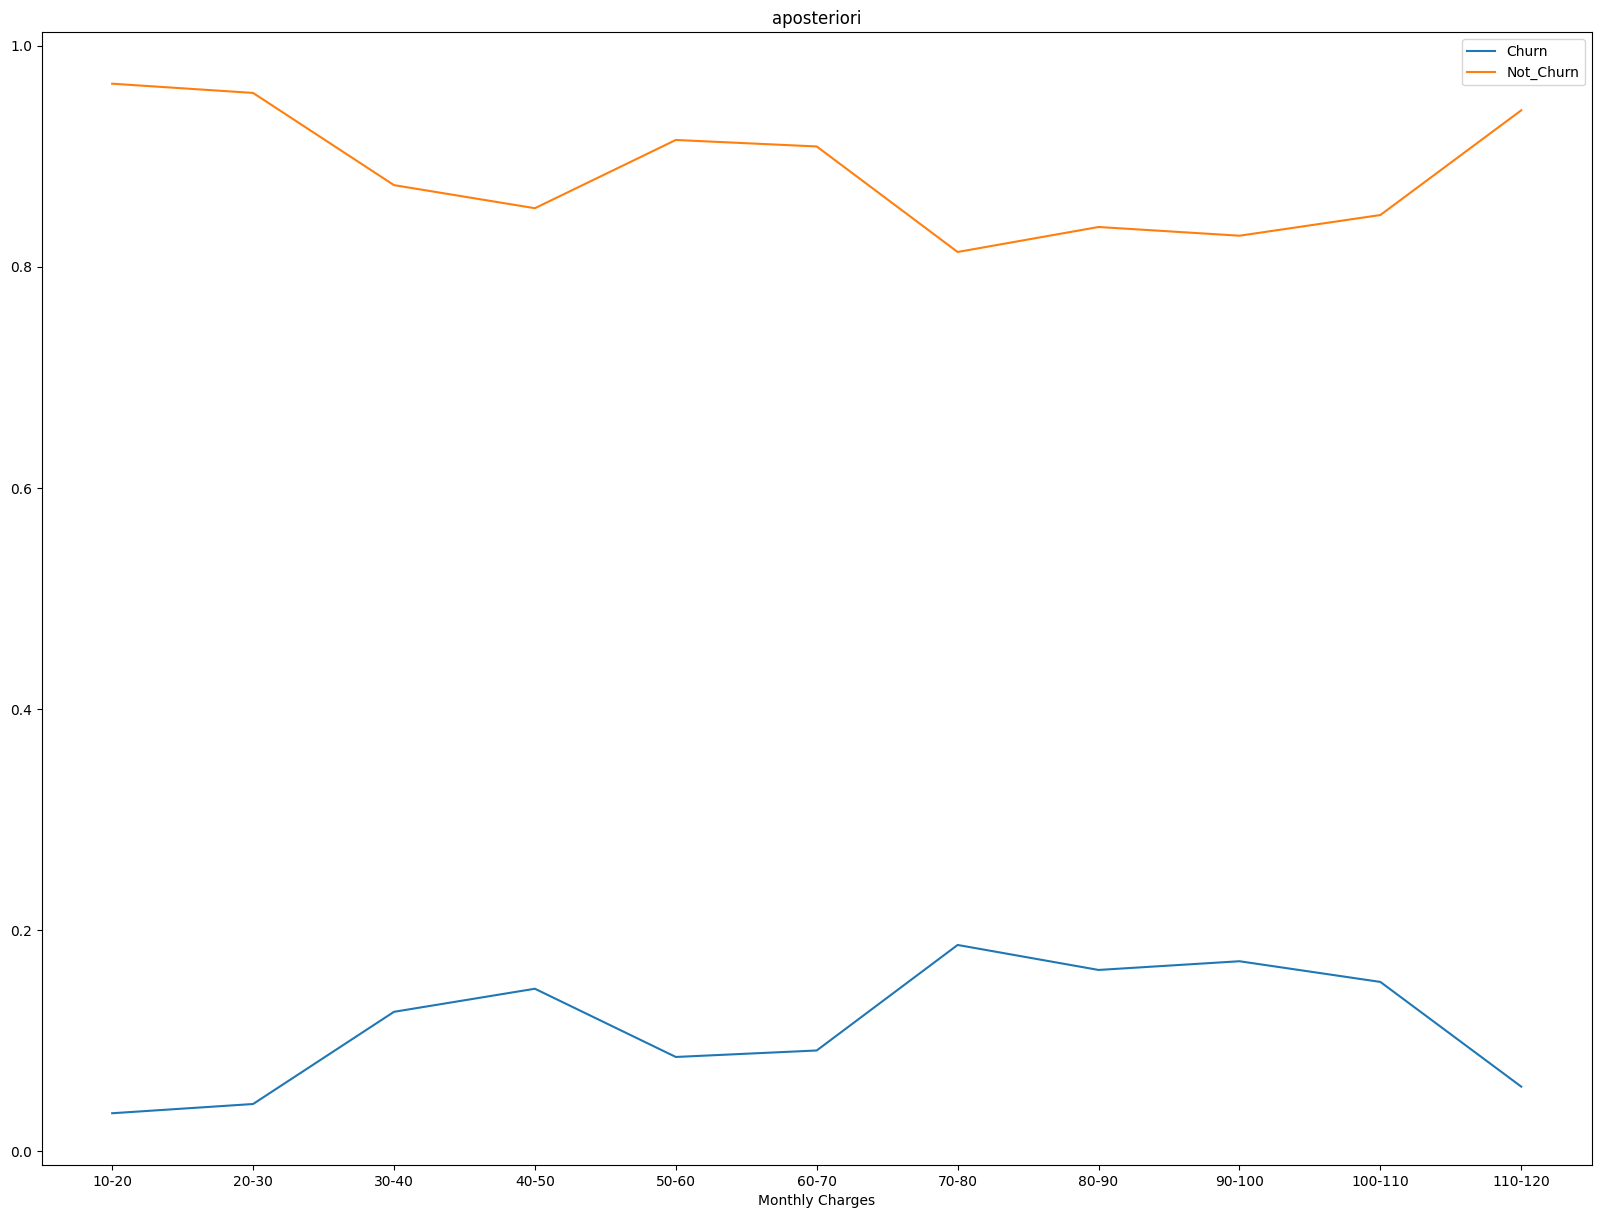

In [134]:
plt.title("aposteriori")
plt.xlabel("Monthly Charges")
plt.plot(x, aposteriori_yes, label = "Churn")
plt.plot(x, aposteriori_no, label = "Not_Churn")
plt.legend()
plt.show()